![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

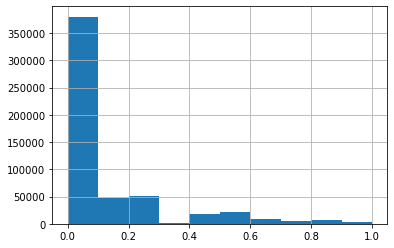

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1

# Se transforman los datos usando CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english',max_features=50)
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

In [10]:
clf = RandomForestRegressor()
clf.fit(X_train_v, y_train)
y_pred=clf.predict(X_test_v)
mse_cv= mean_squared_error(y_test, y_pred)

print("MSE: ", mse_cv)

MSE:  0.041198490853942386


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 2
vectorizer=CountVectorizer(lowercase=True, stop_words='english', ngram_range=(3, 3),max_features=50)

X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

In [12]:
clf = RandomForestRegressor()
clf.fit(X_train_v, y_train)
y_pred=clf.predict(X_test_v)
mse_tri= mean_squared_error(y_test, y_pred)

print("MSE: ", mse_tri)

MSE:  0.03897766883489547


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### #Celda 3

La funcion TfidfVectorizer utiliza una combinación de dos técnicas: la frecuencia de términos inversa (TF-IDF) y la tokenización para el procesamiento de lengiaje natural.

La frecuencia de términos inversa (TF-IDF) es una técnica que mide la relevancia de una palabra en un documento. La relevancia se determina por dos factores: la frecuencia de la palabra en el documento (TF) y la frecuencia inversa del término en el corpus (IDF). La frecuencia de la palabra en el documento es el número de veces que aparece la palabra en el documento. La frecuencia inversa del término en el corpus se calcula como el logaritmo del número total de documentos en el corpus dividido por el número de documentos que contienen la palabra.

La tokenización, por su parte, es el proceso de dividir el texto en unidades más pequeñas, llamadas tokens. Los tokens pueden ser palabras individuales, signos de puntuación, números, etc.

El TfidfVectorizer combina estas dos técnicas para producir un vector numérico para cada documento que refleja la relevancia de cada palabra en ese documento en relación con el corpus completo. Para cada documento, el TfidfVectorizer calcula la frecuencia de cada palabra en el documento (TF) y la frecuencia inversa del término en el corpus (IDF). Luego, multiplica estas dos medidas para obtener el valor de peso de cada palabra. El resultado es un vector numérico para cada documento que contiene valores de peso para cada palabra.

Las ventajas de TfidfVectorizer en comparación con CountVectorizer son varias. En primer lugar, TfidfVectorizer tiene en cuenta la frecuencia inversa de los términos en el corpus, lo que significa que palabras como "the" y "and" que aparecen con frecuencia en muchos documentos, tienen un valor de peso bajo en comparación con palabras menos comunes que son más relevantes para un documento específico. En segundo lugar, TfidfVectorizer es capaz de detectar y eliminar palabras irrelevantes o ruido en el corpus, lo que puede mejorar la calidad de los resultados. Finalmente, TfidfVectorizer es capaz de manejar grandes conjuntos de datos y reducir el costo computacional en comparación con CountVectorizer, lo que puede ser una ventaja en situaciones donde el tiempo de procesamiento es un factor importante.

La principal desventaja de TfidfVectorizer es que puede ser menos efectivo en documentos cortos o con pocos términos, ya que el cálculo del peso de las palabras depende de la frecuencia de los términos en el documento. En estos casos, CountVectorizer podría ser una mejor opción.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(lowercase=True, stop_words='english',max_features=50)

X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

In [14]:
clf = RandomForestRegressor()
clf.fit(X_train_v, y_train)
y_pred=clf.predict(X_test_v)
mse_tfidf= mean_squared_error(y_test, y_pred)

print("MSE: ", mse_tfidf)

MSE:  0.03999779687911962


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

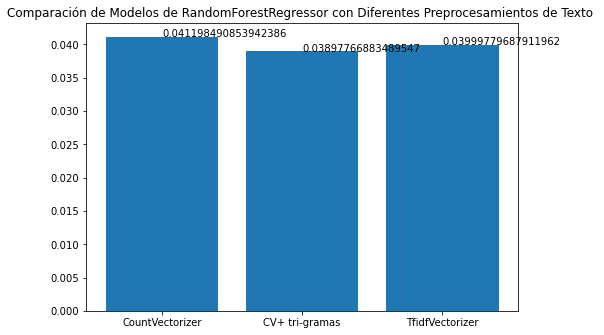

In [15]:
# Celda 5
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Modelos de RandomForestRegressor con Diferentes Preprocesamientos de Texto ")
ejeX = ['CountVectorizer','CV+ tri-gramas','TfidfVectorizer']
ejeY = [mse_cv, mse_tri,mse_tfidf]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()